### Loading package and data
Here I load the obspy, numpy and matplotlib packages for reading segy files, sorting and plotting data.

In [1]:
%matplotlib inline

'''
script to read, sort and save Aramco time-domain data
'''
# import numpy as np
from obspy.io.segy.core import _read_segy
import numpy as np
import matplotlib.pyplot as plt

# make fonts look latexy
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = "cm"
DATA = _read_segy("synthetic.ricker.50Hz.sgy")

### Trace info
For a specific trace number, this method outputs the source $x$ and $y$ positions and elevation info. It also outputs the same infor for the receiver.

In [2]:
def get_trace_info(trace_num, data=DATA):
    '''
    :param trace_num: index of trace to extract info from
    :param data: the sgy data that contains all the traces
    :return: prints all the relevant info of this trace
    '''
    print('----------------------------')
    print('Trace no. ' + str(trace_num) + ' info:')
    print('----------------------------')
    print('source x position: ' +
          str(data[trace_num].
              stats.segy.trace_header.source_coordinate_x))
    print('source y position: ' +
          str(data[trace_num].
              stats.segy.trace_header.source_coordinate_y))
    print('receiver x position: ' +
          str(data[trace_num].
              stats.segy.trace_header.group_coordinate_x))
    print('receiver y position: ' +
          str(data[trace_num].
              stats.segy.trace_header.group_coordinate_y))
    print('source elevation: ' +
          str(data[trace_num].
              stats.segy.trace_header.surface_elevation_at_source))
    print('receiver elevation: ' +
          str(data[trace_num].
              stats.segy.trace_header.receiver_group_elevation))
    print('\n')
def get_src_rcv_coordinates_and_time(data=DATA):
    '''
    Input: segy data
    Output: sorted source and receiver x, y and z locations and time
    '''

    # get coordinates
    rcv_x = set()
    rcv_y = set()
    src_x = set()
    src_y = set()
    for _ix in np.arange(len(data)):
        rcv_x.add(data[_ix].stats.segy.trace_header.group_coordinate_x)
        rcv_y.add(data[_ix].stats.segy.trace_header.group_coordinate_y)
        src_x.add(data[_ix].stats.segy.trace_header.source_coordinate_x)
        src_y.add(data[_ix].stats.segy.trace_header.source_coordinate_y)
    rcv_x = np.sort(np.asarray(list(rcv_x)))
    rcv_y = np.sort(np.asarray(list(rcv_y)))
    src_x = np.sort(np.asarray(list(src_x)))
    src_y = np.sort(np.asarray(list(src_y)))
    # print('Receiver x locations:\n' + str(rcv_x))
    # print('Receiver y locations:\n' + str(rcv_y))
    # print('Source x locations:\n' + str(src_x))
    # print('Source y locations:\n' + str(src_y))

    # get time
    tr_num = len(data) - 1
    sample_interval = data[tr_num].stats.segy.trace_header. \
        sample_interval_in_ms_for_this_trace
    num_samples = data[tr_num].stats.segy.trace_header. \
        number_of_samples_in_this_trace
    # print(data[tr_num].stats.segy.trace_header)
    time_step = sample_interval / 1e6
    time = np.linspace(0, (num_samples - 1) * time_step,
                       num=num_samples, endpoint=True)
    # print('Time intervals:\n' + str(time))

    return src_x, src_y, rcv_x, rcv_y, time

### Trace plot
Given a trace number, I plot that trace where the $x$ axis is the time and the $y$ axis is the amplitude.

In [3]:
def plot_trace(trace_num, data=DATA):
    '''
    :param trace_num: index of trace to extract info from
    :param data: the sgy data that contains all the traces
    :return: plots the input trace
    '''
    data[trace_num].plot()

### First trace plot
Here trace number is $(10 + 10 * 122 + 2 * 122 * 122)$ where this is $(receiver\_index\_in\_x + receiver\_index\_in\_y * number\_of\_receivers\_in\_x + source\_index * total\_number\_of\_receivers)$

Here, I show info for a receiver at the index $(10,10)$ and for source number $2$. The receiver is close to the source, so I am expecting to get **early first arrivals**.

----------------------------
Trace no. 30998 info:
----------------------------
source x position: 225
source y position: 2725
receiver x position: 1000
receiver y position: 2100
source elevation: 569
receiver elevation: 584




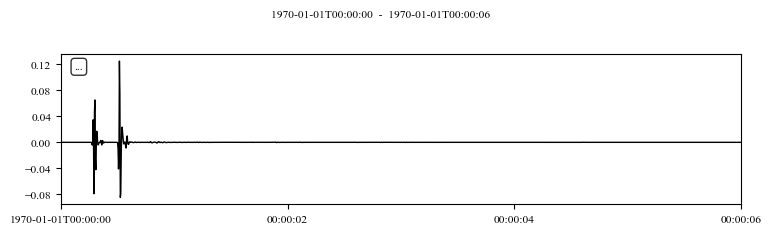

In [4]:
_, _, _, _, time = get_src_rcv_coordinates_and_time()

id1 = 10 + 10 * 122 + 2 * 122 * 122
get_trace_info(id1)
plot_trace(id1)

### Second trace plot
Here trace number is $(10 + 10 * 122 + 58 * 122 * 122)$ where this is $(receiver\_index\_in\_x + receiver\_index\_in\_y * number\_of\_receivers\_in\_x + source\_index * total\_number\_of\_receivers)$

Here, I show info for a receiver at the index $(10,10)$ and for source number $58$. The receiver is far from the source, so I am expecting to get **late first arrivals which I don't get**.

----------------------------
Trace no. 864502 info:
----------------------------
source x position: 5825
source y position: 2725
receiver x position: 1000
receiver y position: 2100
source elevation: 577
receiver elevation: 584




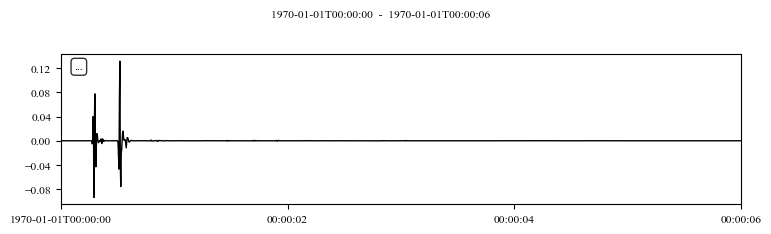

In [5]:
id2 = 10 + 10 * 122 + 58 * 122 * 122
get_trace_info(id2)
plot_trace(id2)

### Plotting the near and far offsets
Here I plot the near and far offsets on top of each other with zooming to the first second. These two traces should have a delay because once source is near and the other is far.

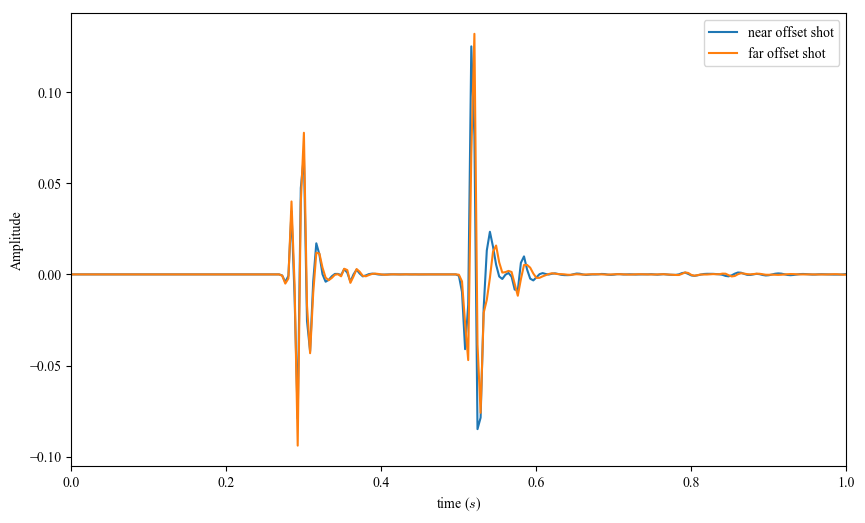

In [6]:
FIG1 = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

_a = np.array(DATA[id1].data)
plt.plot(time, _a, label='near offset shot')

_b = np.array(DATA[id2].data)
plt.plot(time, _b, label='far offset shot')

plt.xlim([0, 1])
plt.xlabel(r'time ($s$)')
plt.ylabel(r'Amplitude')
plt.legend()
plt.show()